### increase ram size if required

In [ ]:
i = []
while True:
  i.append(i)

### mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind_from_stats 
import seaborn as sns
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### load bands names

In [ ]:
# getting list of bands
source_file = '/content/drive/MyDrive/Thesis/source/bands.txt'
band_list = []
with open(source_file, "r") as listOfBands:
    for line in listOfBands:
        band_list.append(line.strip())

print(len(band_list))

186


#### t-test and distributions

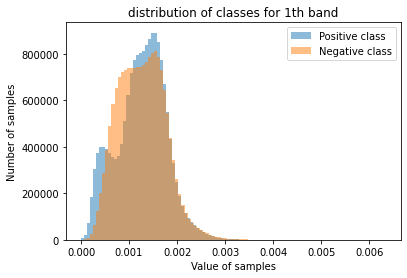

1 out of 186


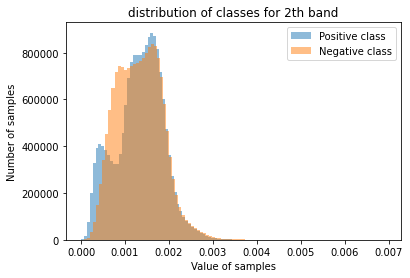

2 out of 186


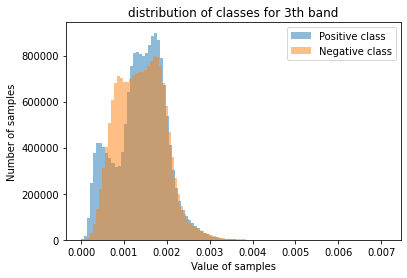

3 out of 186


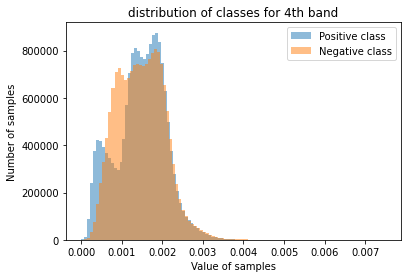

4 out of 186


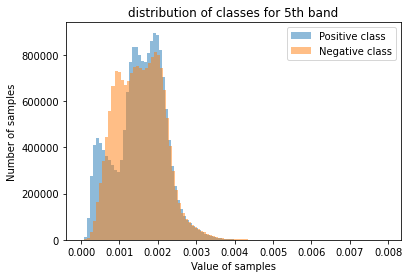

5 out of 186


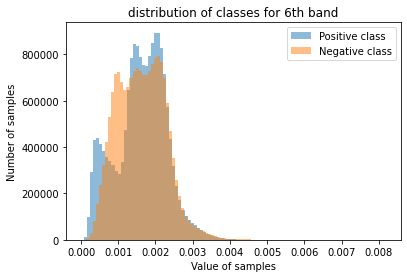

6 out of 186


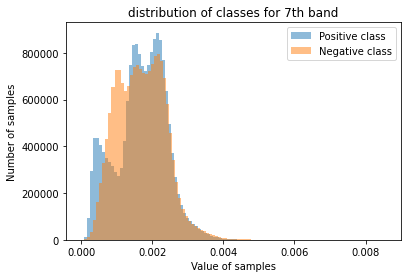

7 out of 186


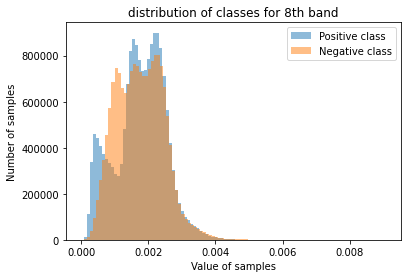

8 out of 186


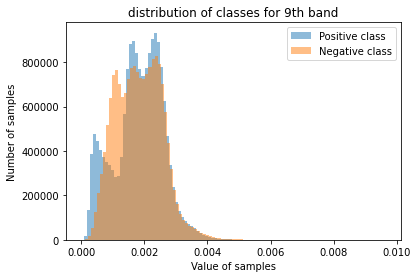

9 out of 186


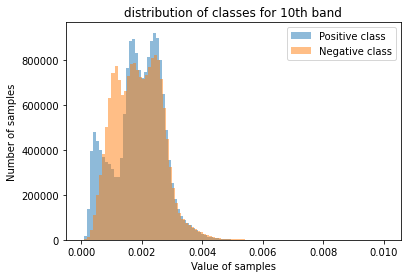

10 out of 186


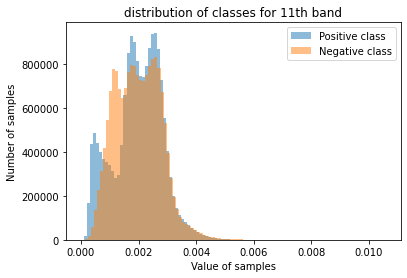

11 out of 186


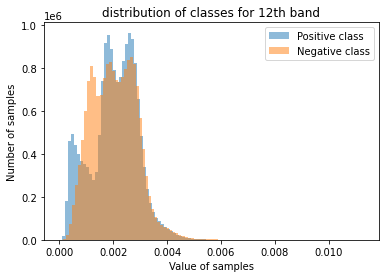

12 out of 186


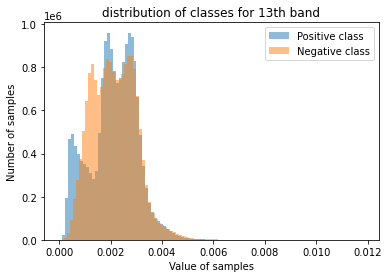

13 out of 186


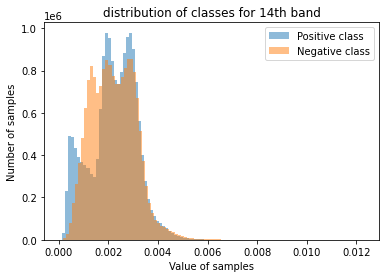

14 out of 186


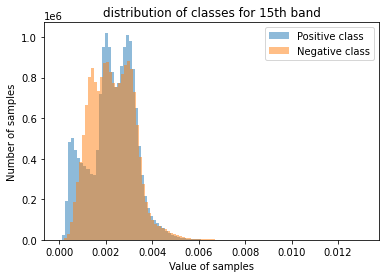

15 out of 186


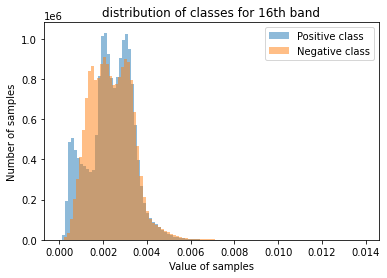

16 out of 186


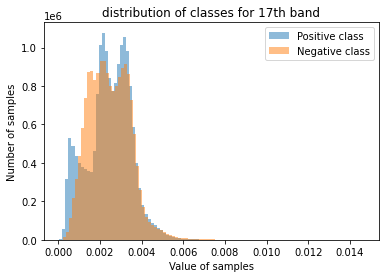

17 out of 186


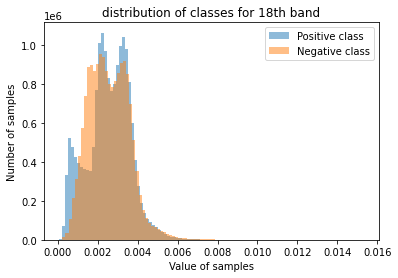

18 out of 186


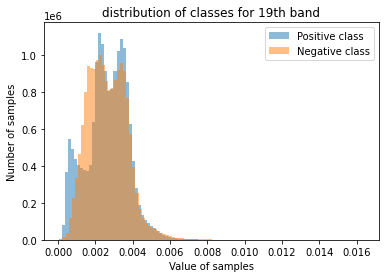

19 out of 186


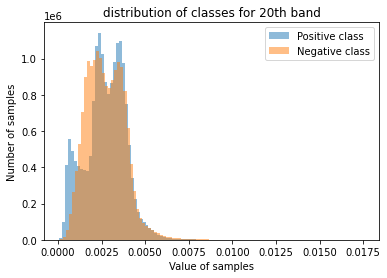

20 out of 186


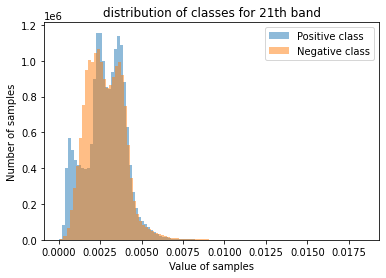

21 out of 186


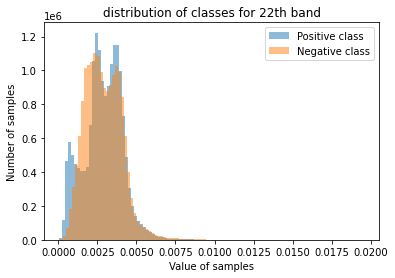

22 out of 186


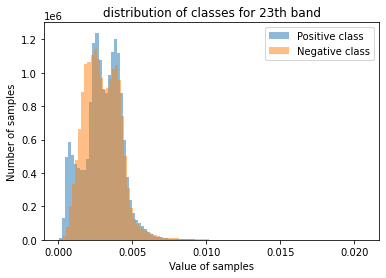

23 out of 186


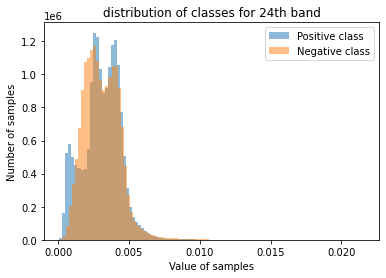

24 out of 186


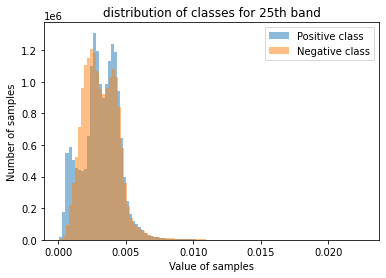

25 out of 186


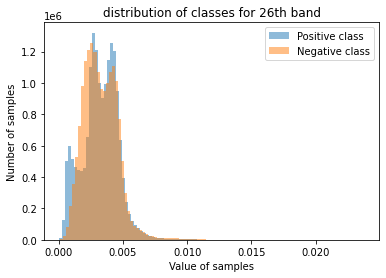

26 out of 186


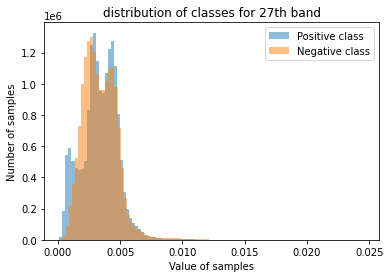

27 out of 186


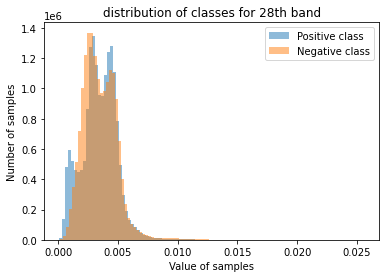

28 out of 186


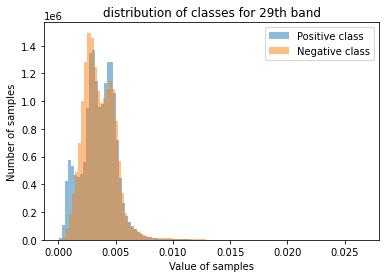

29 out of 186


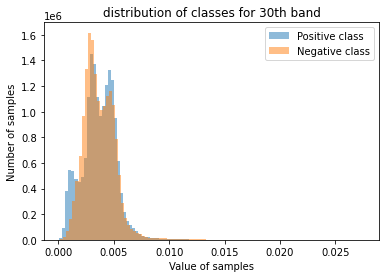

30 out of 186


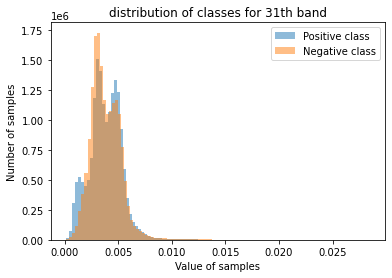

31 out of 186


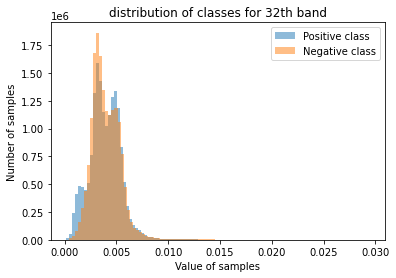

32 out of 186


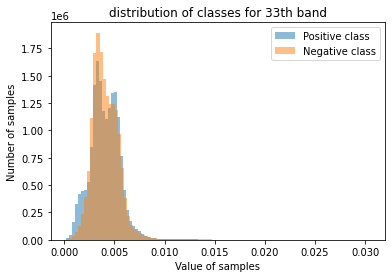

33 out of 186


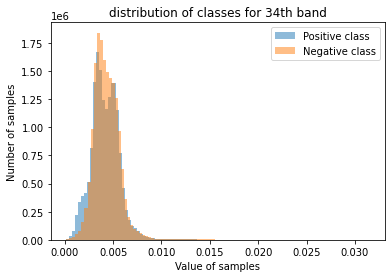

34 out of 186


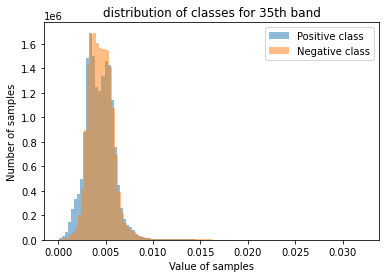

35 out of 186


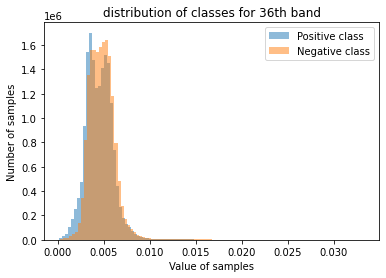

36 out of 186


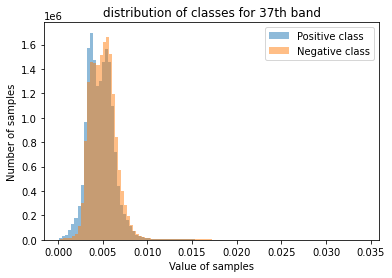

37 out of 186


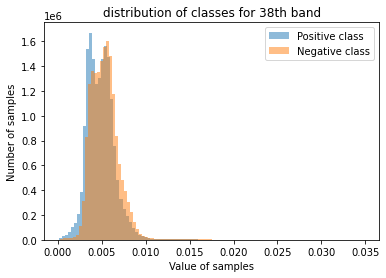

38 out of 186


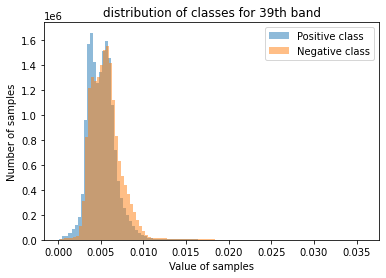

39 out of 186


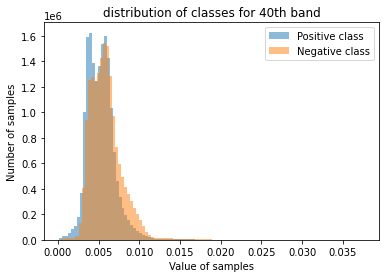

40 out of 186


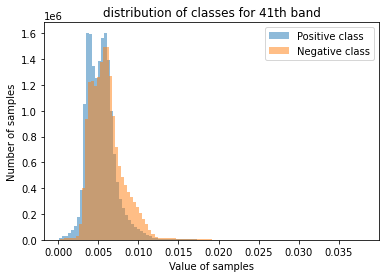

41 out of 186


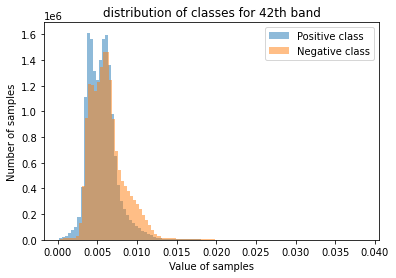

42 out of 186


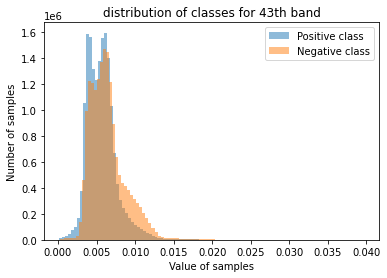

43 out of 186


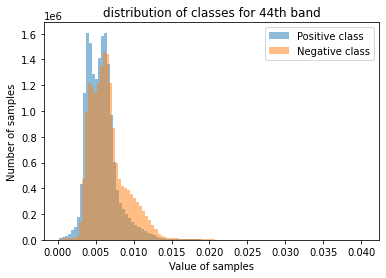

44 out of 186


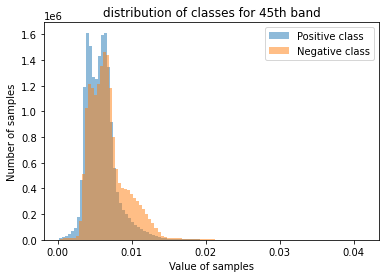

45 out of 186


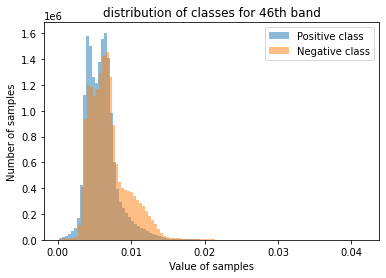

46 out of 186


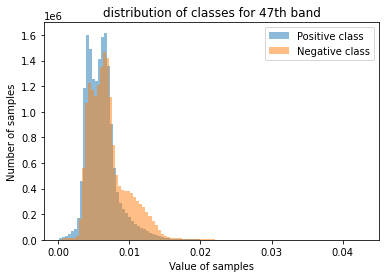

47 out of 186


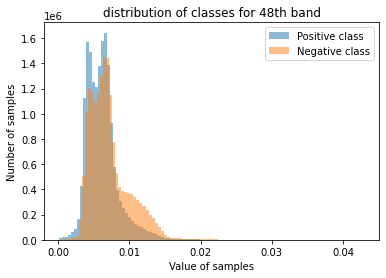

48 out of 186


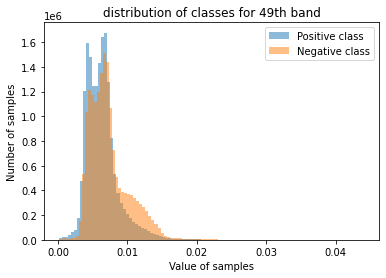

49 out of 186


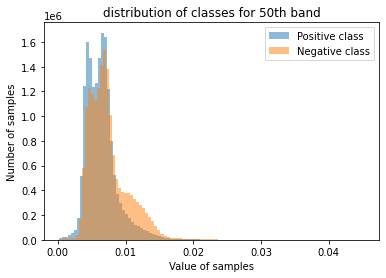

50 out of 186


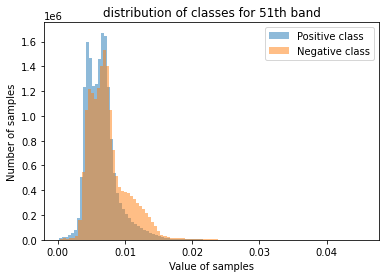

51 out of 186


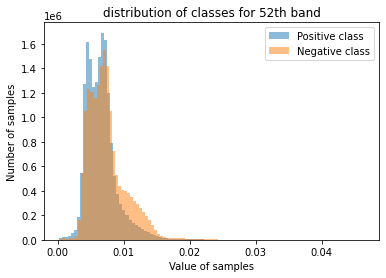

52 out of 186


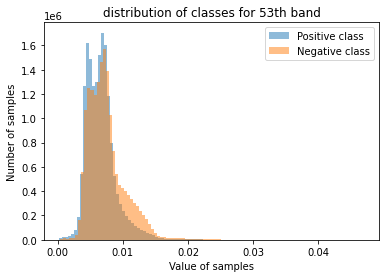

53 out of 186


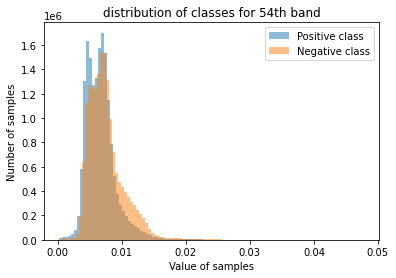

54 out of 186


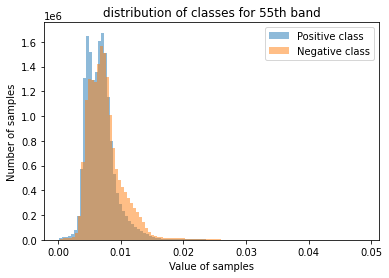

55 out of 186


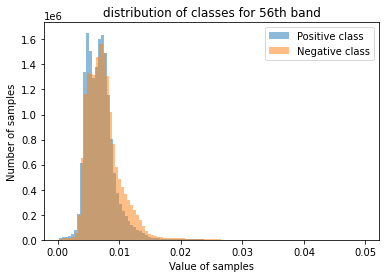

56 out of 186


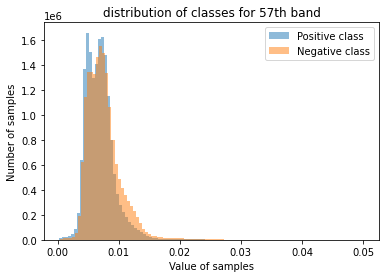

57 out of 186


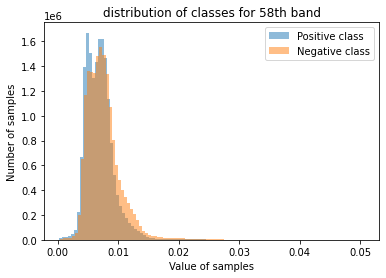

58 out of 186


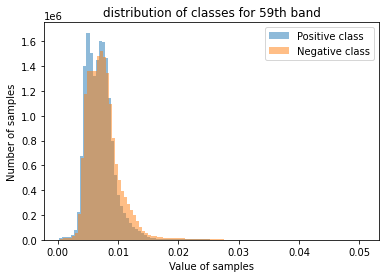

59 out of 186


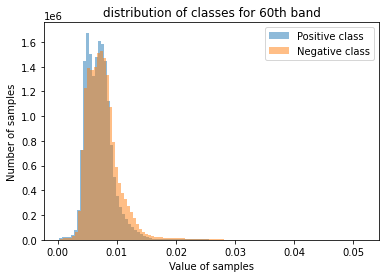

60 out of 186


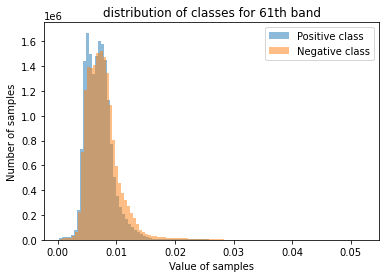

61 out of 186


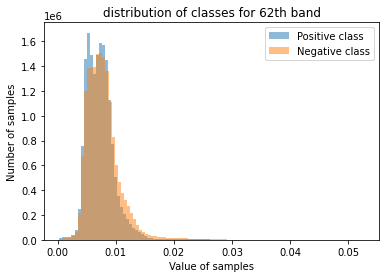

62 out of 186


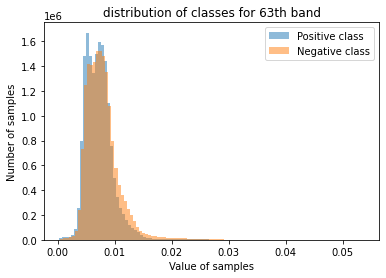

63 out of 186


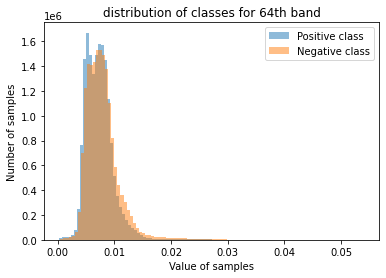

64 out of 186


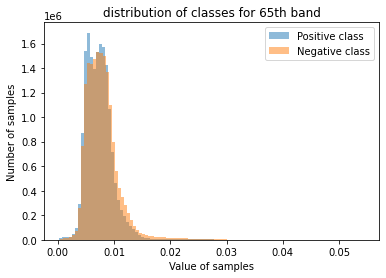

65 out of 186


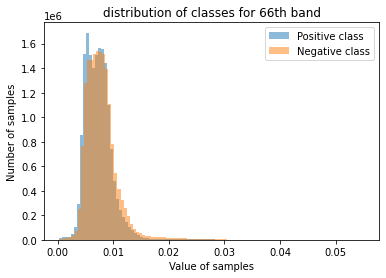

66 out of 186


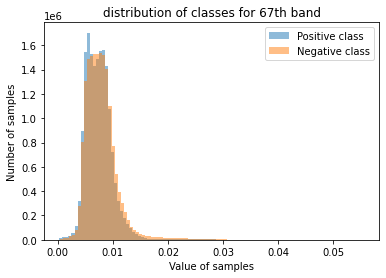

67 out of 186


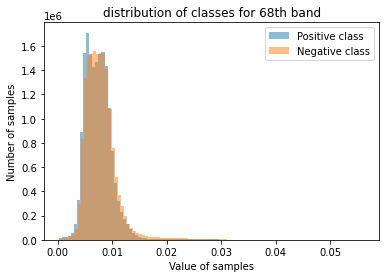

68 out of 186


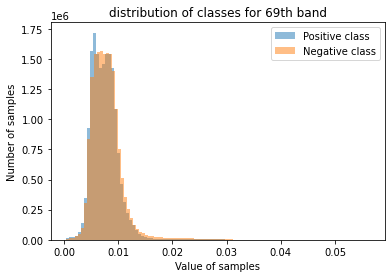

69 out of 186


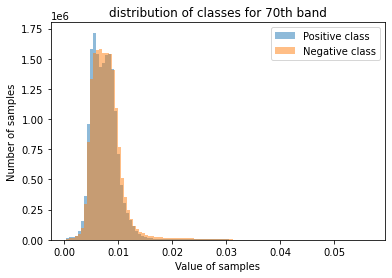

70 out of 186


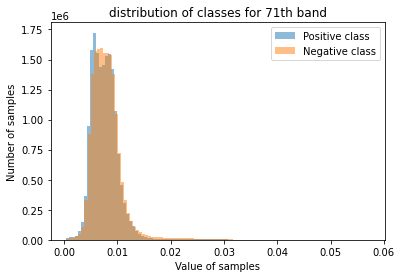

71 out of 186


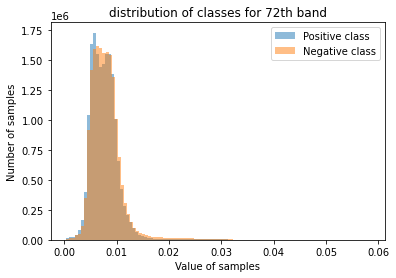

72 out of 186


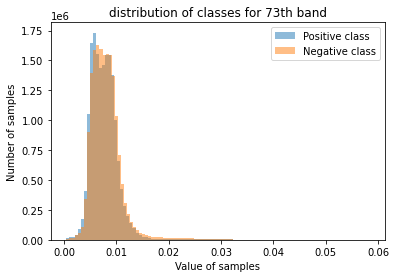

73 out of 186


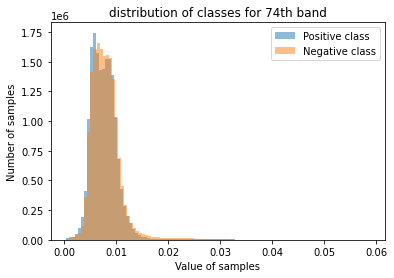

74 out of 186


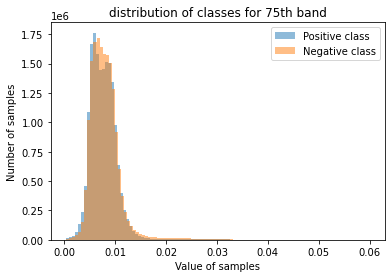

75 out of 186


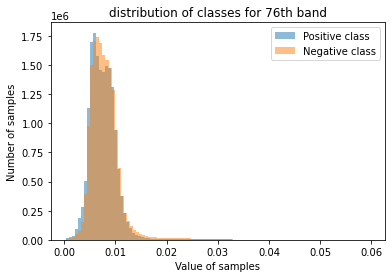

76 out of 186


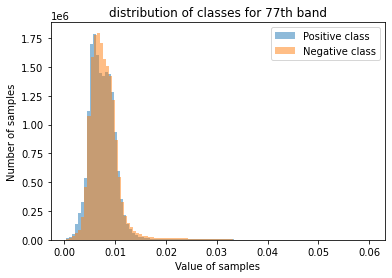

77 out of 186


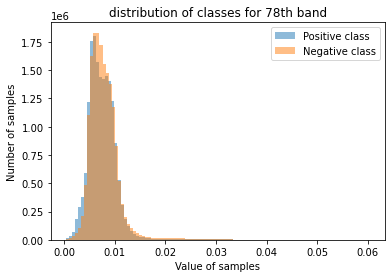

78 out of 186


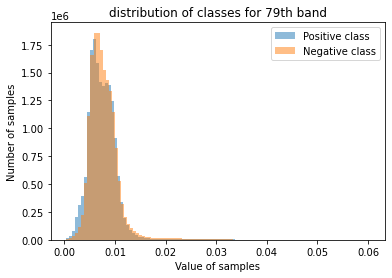

79 out of 186


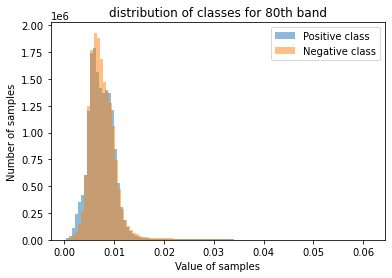

80 out of 186


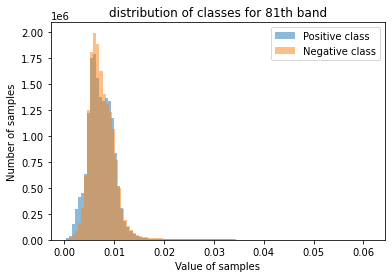

81 out of 186


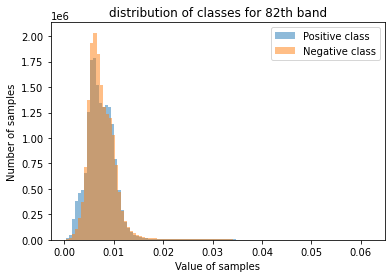

82 out of 186


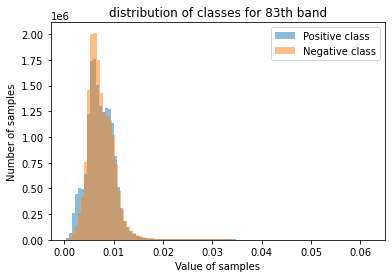

83 out of 186


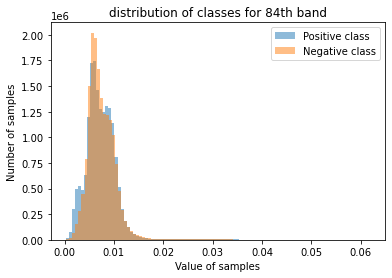

84 out of 186


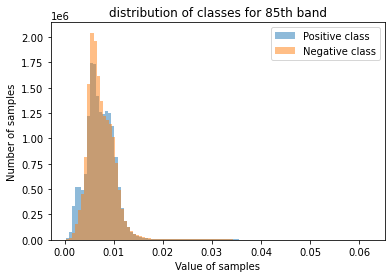

85 out of 186


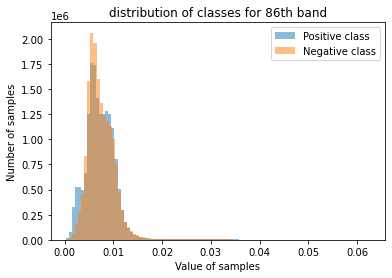

86 out of 186


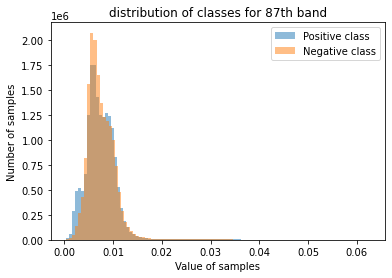

87 out of 186


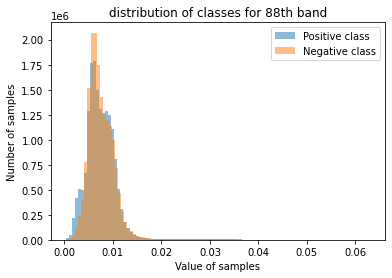

88 out of 186


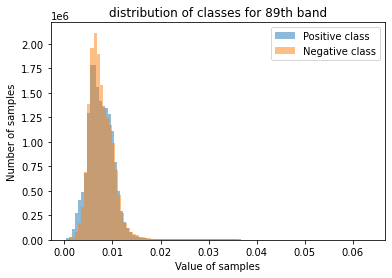

89 out of 186


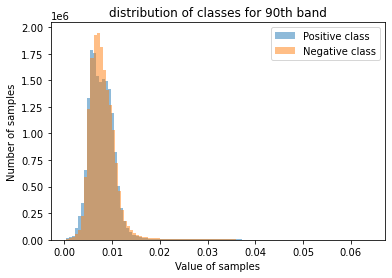

90 out of 186


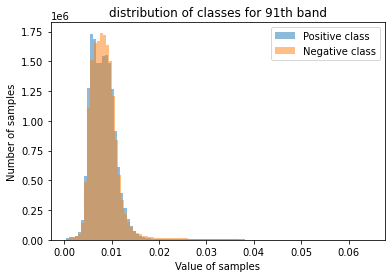

91 out of 186


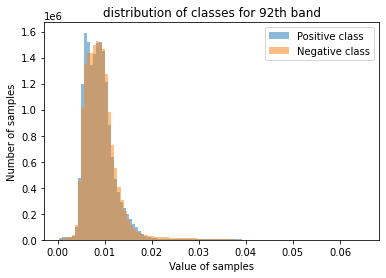

92 out of 186


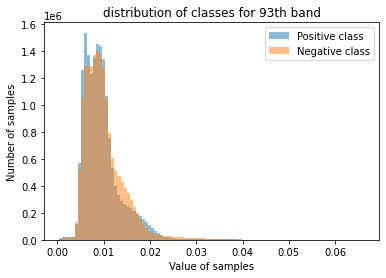

93 out of 186


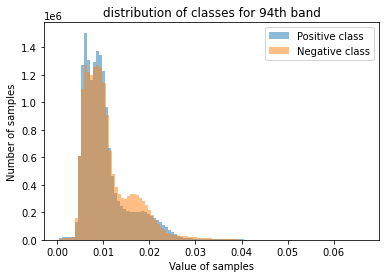

94 out of 186


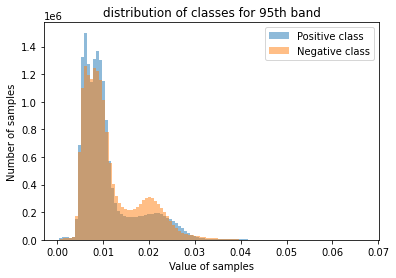

95 out of 186


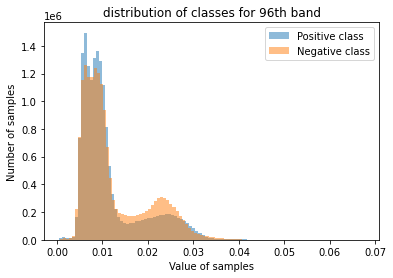

96 out of 186


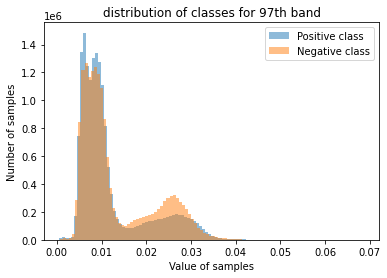

97 out of 186


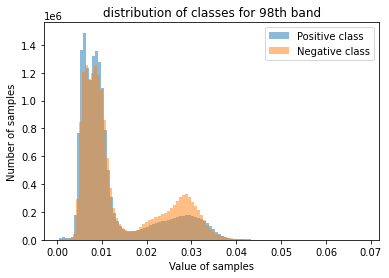

98 out of 186


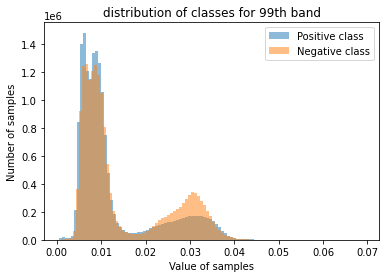

99 out of 186


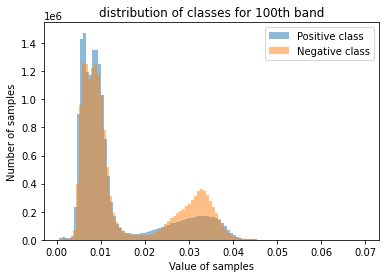

100 out of 186


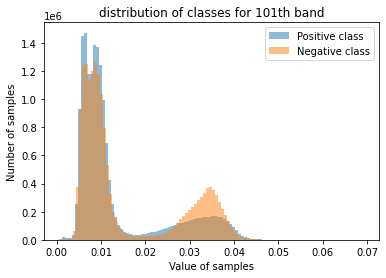

101 out of 186


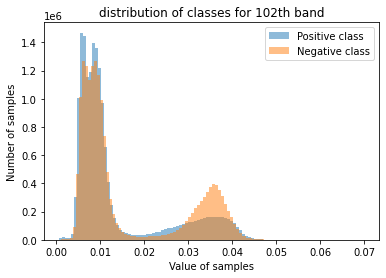

102 out of 186


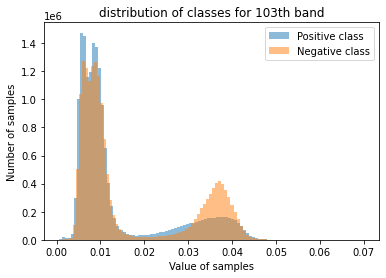

103 out of 186


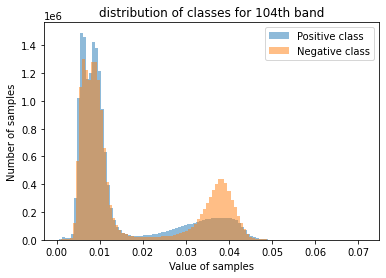

104 out of 186


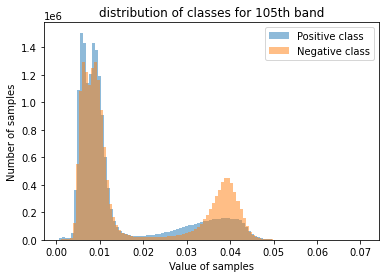

105 out of 186


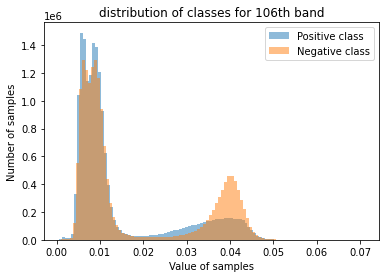

106 out of 186


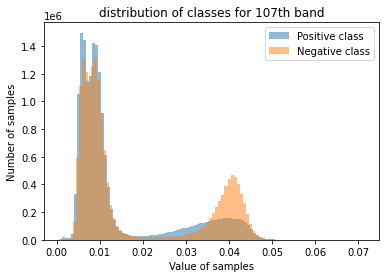

107 out of 186


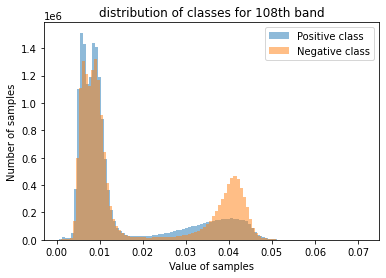

108 out of 186


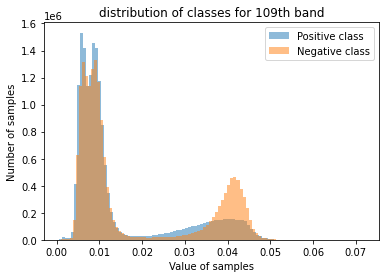

109 out of 186


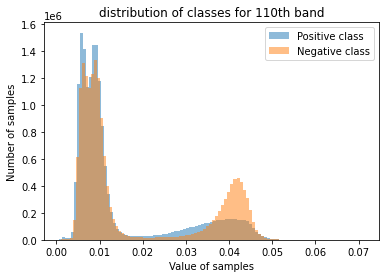

110 out of 186


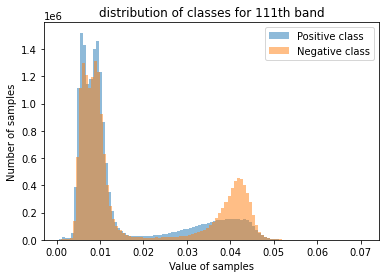

111 out of 186


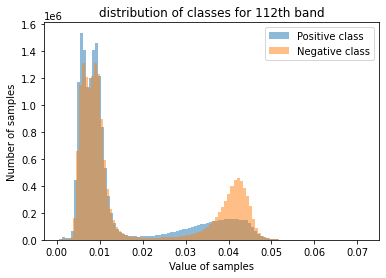

112 out of 186


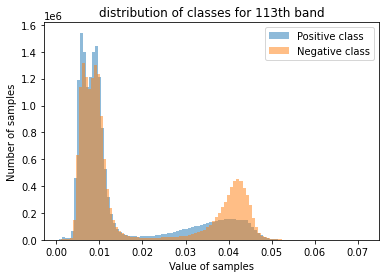

113 out of 186


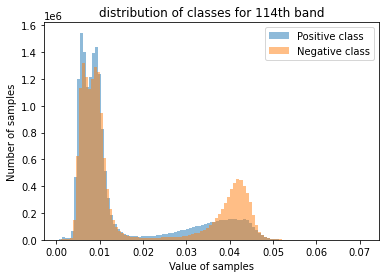

114 out of 186


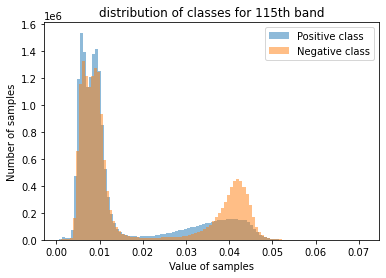

115 out of 186


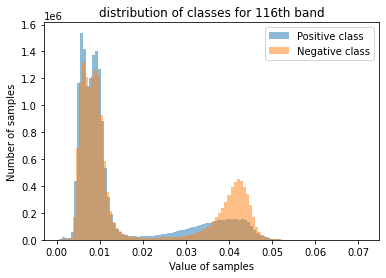

116 out of 186


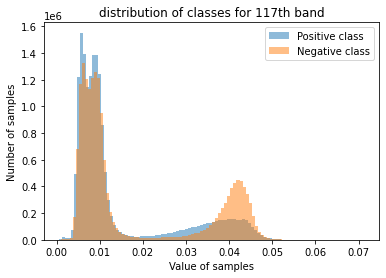

117 out of 186


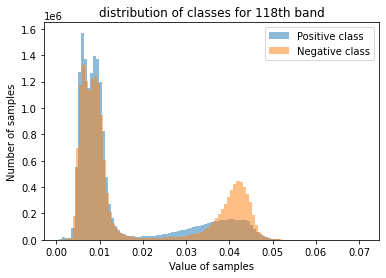

118 out of 186


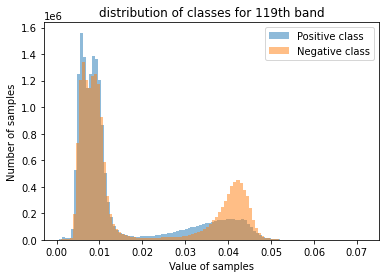

119 out of 186


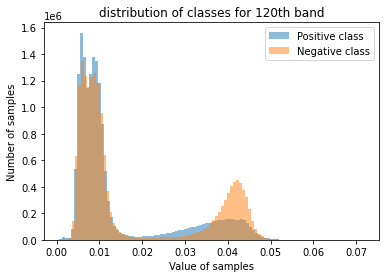

120 out of 186


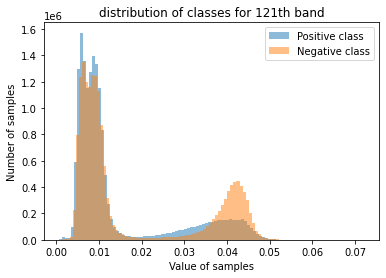

121 out of 186


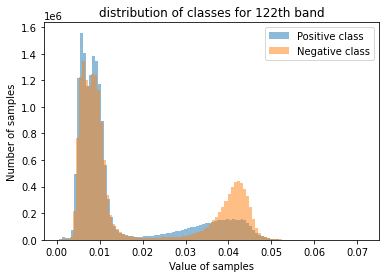

122 out of 186


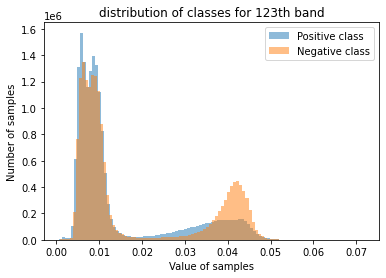

123 out of 186


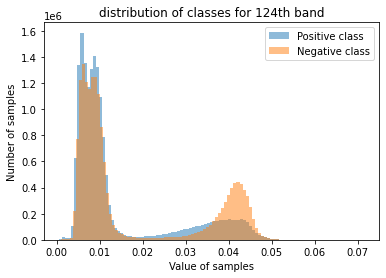

124 out of 186


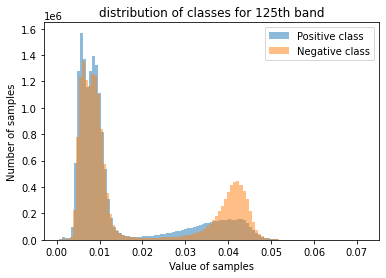

125 out of 186


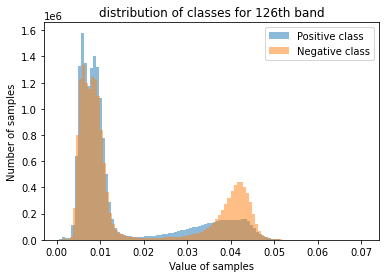

126 out of 186


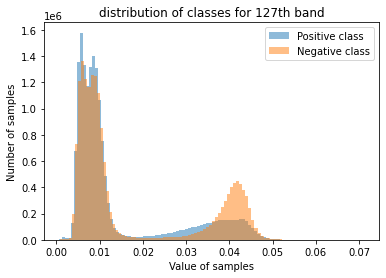

127 out of 186


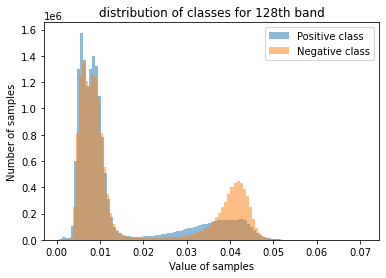

128 out of 186


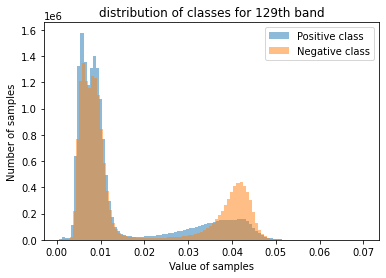

129 out of 186


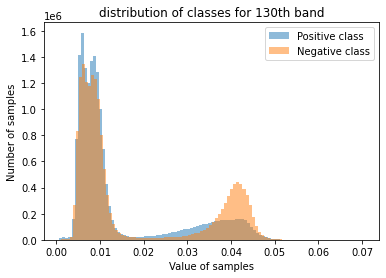

130 out of 186


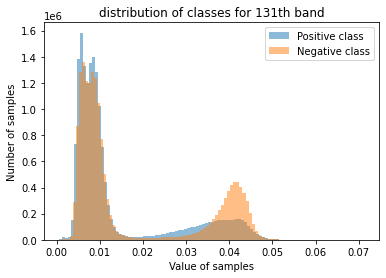

131 out of 186


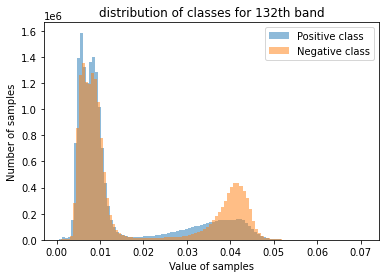

132 out of 186


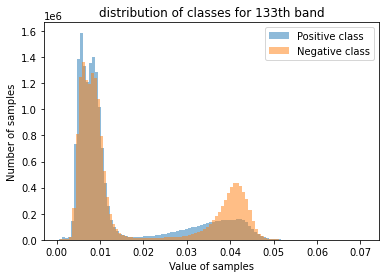

133 out of 186


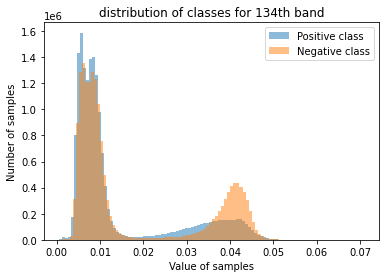

134 out of 186


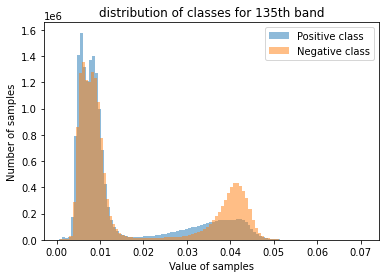

135 out of 186


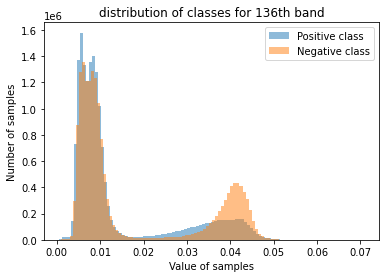

136 out of 186


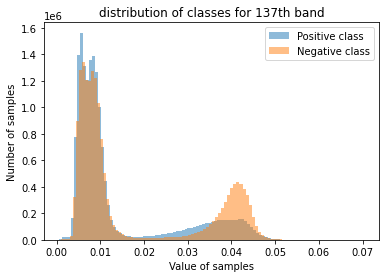

137 out of 186


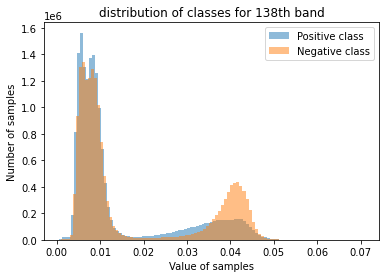

138 out of 186


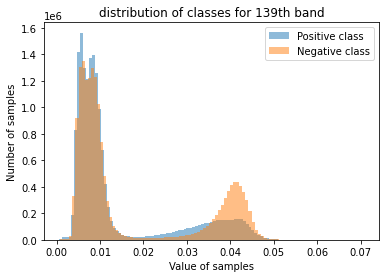

139 out of 186


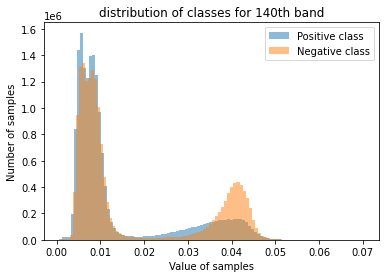

140 out of 186


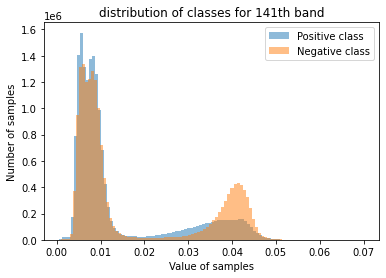

141 out of 186


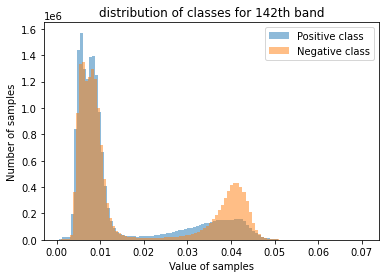

142 out of 186


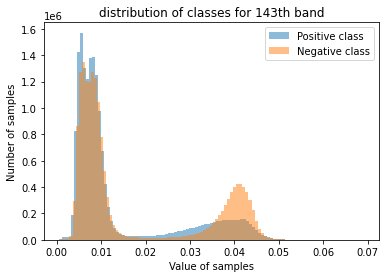

143 out of 186


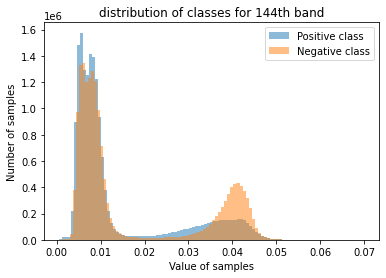

144 out of 186


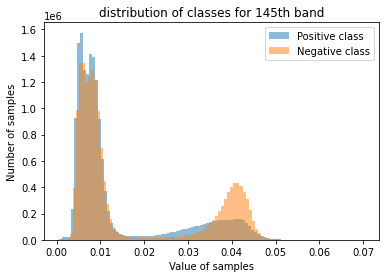

145 out of 186


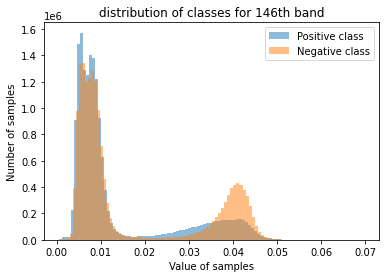

146 out of 186


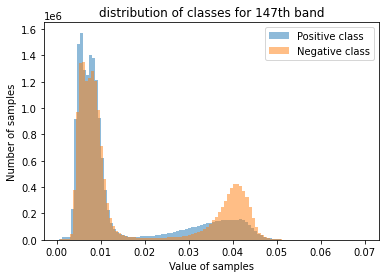

147 out of 186


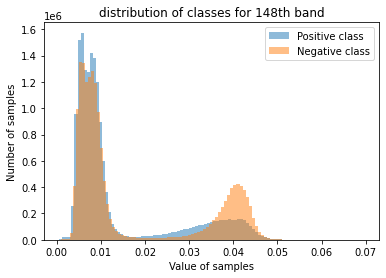

148 out of 186


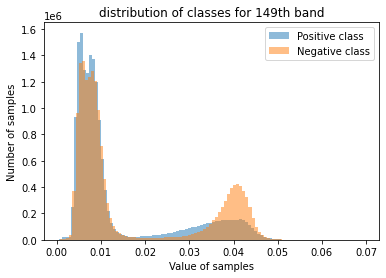

149 out of 186


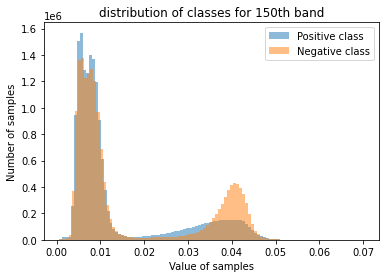

150 out of 186


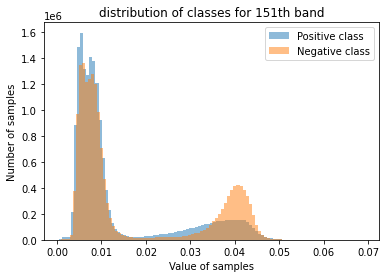

151 out of 186


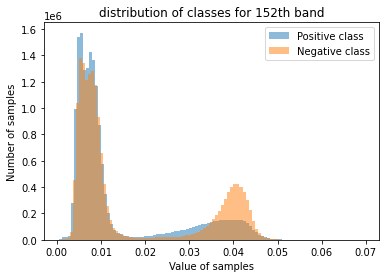

152 out of 186


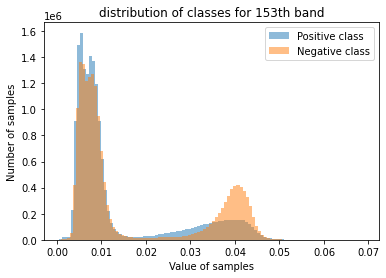

153 out of 186


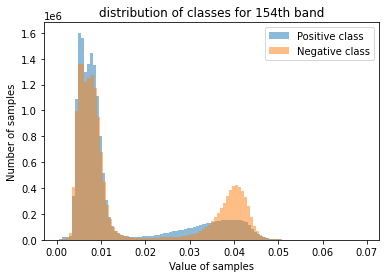

154 out of 186


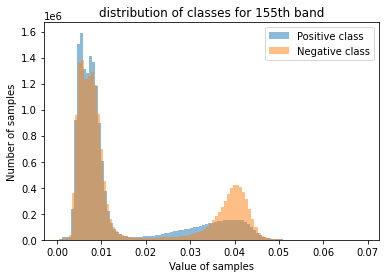

155 out of 186


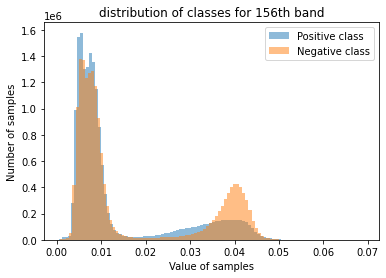

156 out of 186


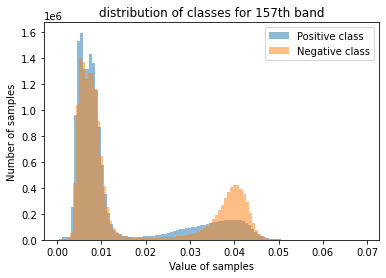

157 out of 186


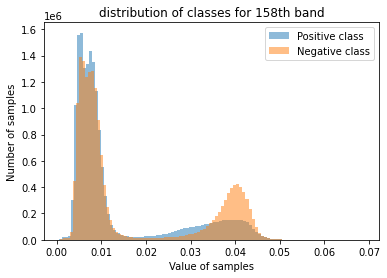

158 out of 186


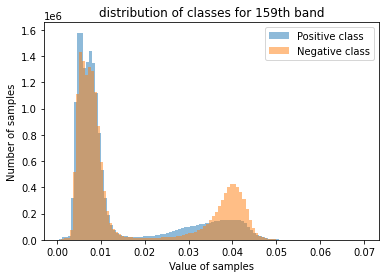

159 out of 186


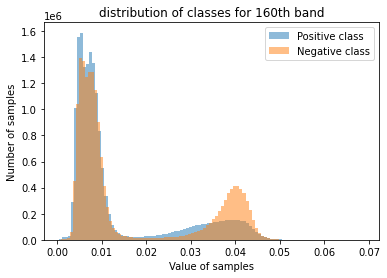

160 out of 186


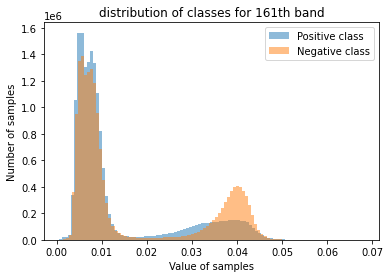

161 out of 186


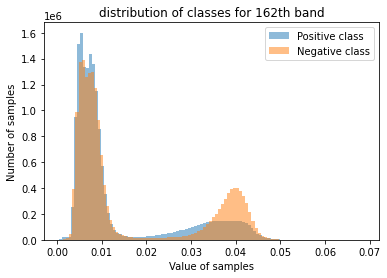

162 out of 186


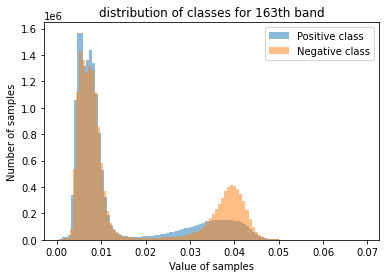

163 out of 186


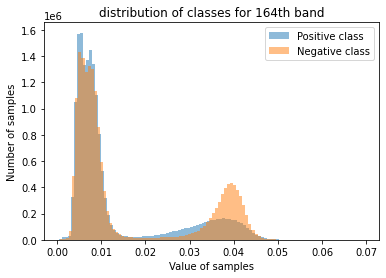

164 out of 186


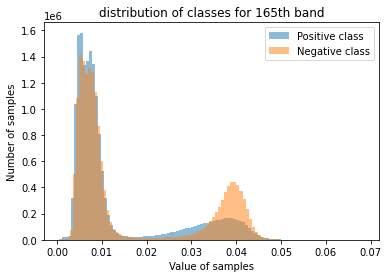

165 out of 186


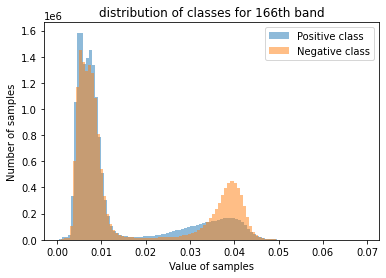

166 out of 186


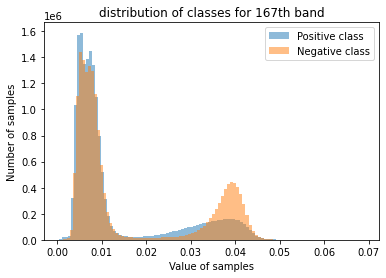

167 out of 186


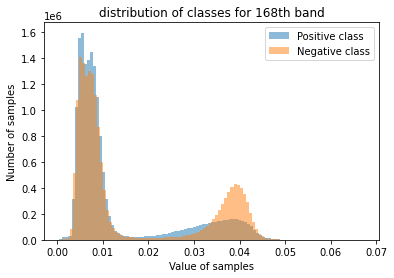

168 out of 186


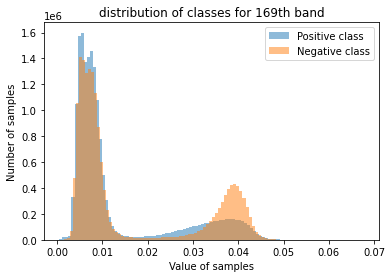

169 out of 186


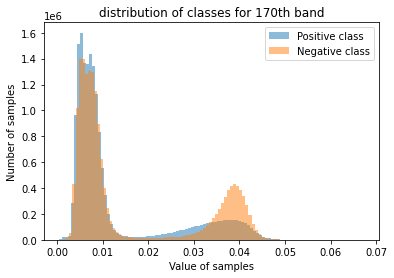

170 out of 186


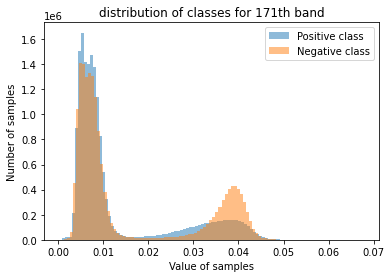

171 out of 186


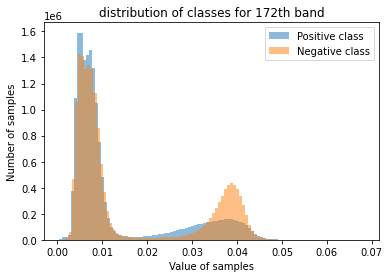

172 out of 186


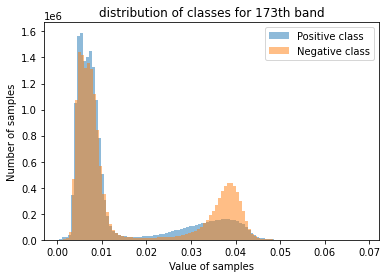

173 out of 186


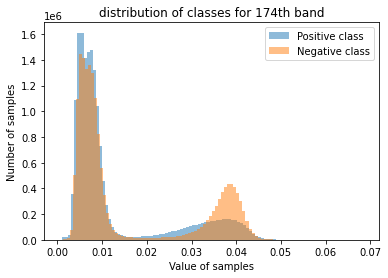

174 out of 186


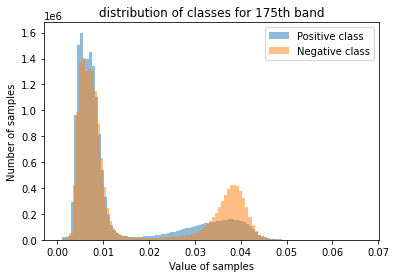

175 out of 186


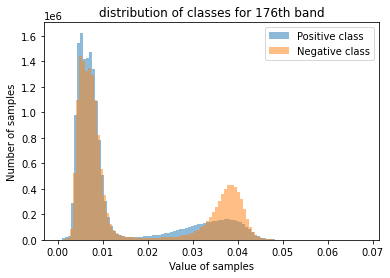

176 out of 186


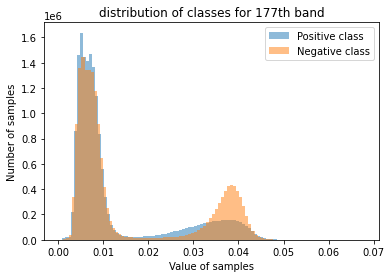

177 out of 186


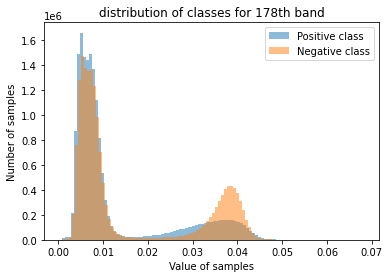

178 out of 186


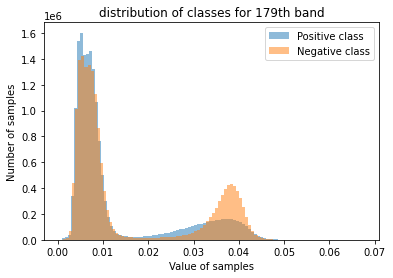

179 out of 186


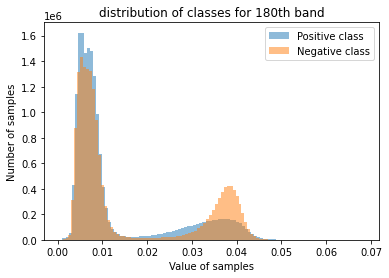

180 out of 186


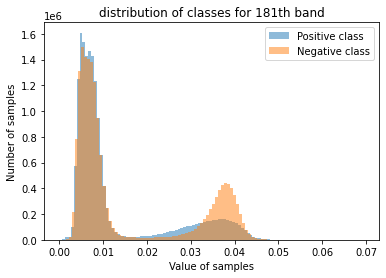

181 out of 186


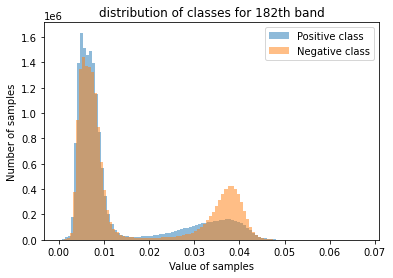

182 out of 186


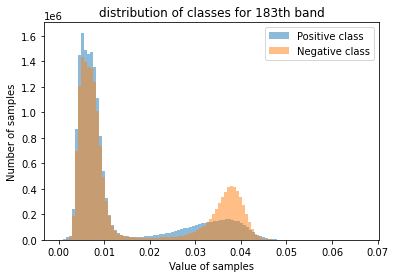

183 out of 186


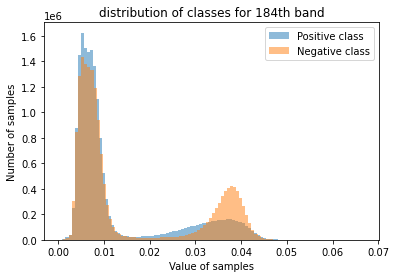

184 out of 186


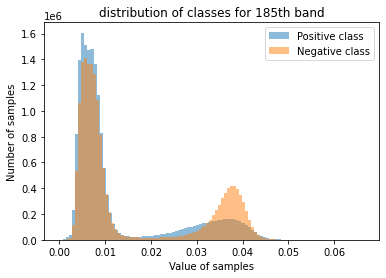

185 out of 186


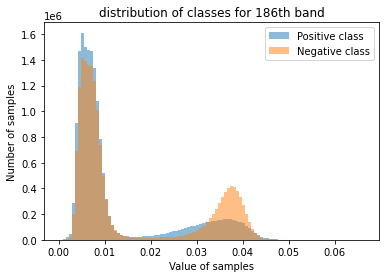

186 out of 186


In [ ]:
# saving t-test and p-score values in csv files and distributions of classes

t_statistic_array = np.array([])
p_value_array = np.array([])

label = np.load('/content/drive/MyDrive/Thesis/bands_unnormalized/label.npy').reshape(-1, 1)

for i in range(len(band_list)):
    band = np.load('/content/drive/MyDrive/Thesis/bands_unnormalized/' + band_list[i] + '.npy')
    band = np.concatenate((band, label), axis=1)
    # index positive and negative class
    pos_ind = band[:, 1:2] == 1
    neg_ind = band[:, 1:2] == 0
    # filter values of classes based on index
    values = band[:, 0:1]
    pos_class = values[pos_ind]
    neg_class = values[neg_ind]

    t_statistic, p_value = stats.ttest_ind(pos_class, neg_class)
    t_statistic_array = np.append(t_statistic_array, t_statistic)
    p_value_array = np.append(p_value_array, p_value)

    plt.hist(pos_class, label='Positive class', bins=100, alpha=0.5)
    plt.hist(neg_class, label='Negative class', bins=100, alpha=0.5)
    plt.xlabel('Value of samples')
    plt.ylabel('Number of samples')
    plt.title('distribution of classes for ' + str(i + 1) + 'th band')
    plt.legend(loc='upper right')
    plt.savefig('/content/drive/MyDrive/Thesis/images/unnormalized/dist/band_' + str(i + 1) + '.png')
    plt.show()

    print(str(i + 1) + ' out of ' + str(186))

np.savetxt('/content/drive/MyDrive/Thesis/files/unnormalized/t_statistic_array.csv', t_statistic_array, delimiter=',')
np.savetxt('/content/drive/MyDrive/Thesis/files/unnormalized/p_value_array.csv', p_value_array, delimiter=',')

### read t-test and p-value data

In [ ]:
# read stored t-test results and wrap it with absolute fanction 
t_statistic_array = np.abs(np.genfromtxt("/content/drive/MyDrive/Thesis/files/unnormalized/t_statistic_array.csv", delimiter=','))
p_value_array = np.abs(np.genfromtxt("/content/drive/MyDrive/Thesis/files/unnormalized/p_value_array.csv", delimiter=','))

In [ ]:
# build a dataframe with columns Band, t_statistic and p_value
features_order = pd.DataFrame(data=t_statistic_array, columns=['t_statistics'])
features_order.insert(loc=0, column="Band", value=np.arange(1, 187, 1))
features_order.insert(loc=2, column="p_value", value=p_value_array)

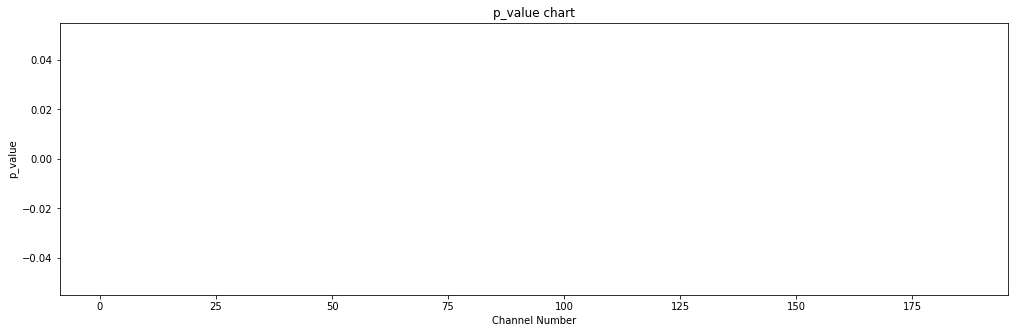

In [ ]:
plt.figure(figsize=(17, 5))
plt.bar(features_order.Band.values, features_order.p_value.values)
plt.xlabel('Channel Number')
plt.ylabel('p_value')
plt.title('p_value chart')
plt.savefig('/content/drive/MyDrive/Thesis/images/unnormalized/t_test/p_value' + '.png')
plt.show()

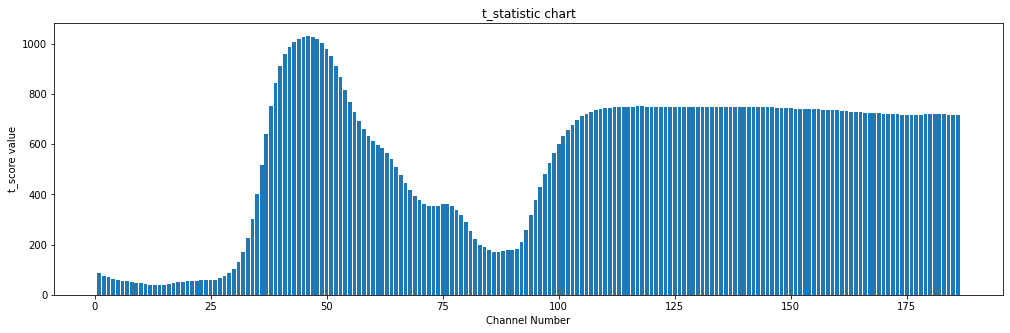

In [ ]:
plt.figure(figsize=(17, 5))
plt.bar(features_order.Band.values, features_order.t_statistics.values)
plt.xlabel('Channel Number')
plt.ylabel('t_score value')
plt.title('t_statistic chart')
plt.savefig('/content/drive/MyDrive/Thesis/images/unnormalized/t_test/t_statistic' + '.png')
plt.show()  

In [ ]:
# features_order: high importance on top
features_order = features_order.sort_values(by='p_value', ascending=False)
features_order.head(3)

,Band,t_statistics,p_value
0,1,88.229641,0.0
127,128,748.734494,0.0
118,119,749.374244,0.0


In [ ]:
# features_order: high importance on top
features_order = features_order.sort_values(by='t_statistics', ascending=False)
features_order.head()

,Band,t_statistics,p_value
45,46,1030.640703,0.0
46,47,1028.151073,0.0
44,45,1026.849209,0.0
47,48,1018.936753,0.0
43,44,1018.346483,0.0


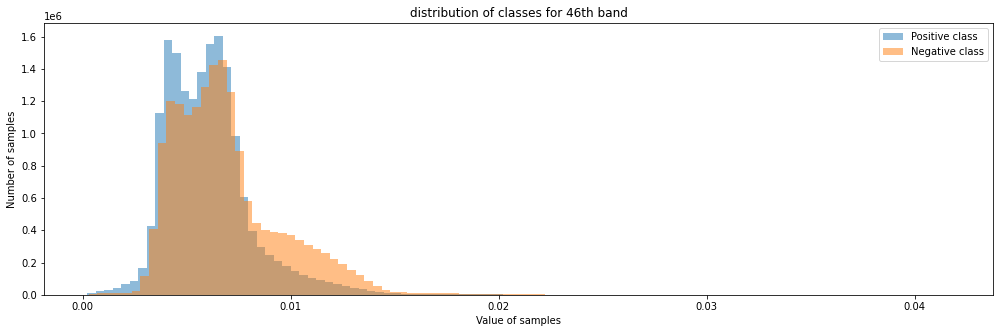

In [ ]:
# load channel 46 for sanity check
label = np.load('/content/drive/MyDrive/Thesis/bands_unnormalized/label.npy').reshape(-1, 1)
band = np.load('/content/drive/MyDrive/Thesis/bands_unnormalized/band_46.npy')
band = np.concatenate((band, label), axis=1)
# index positive and negative class
pos_ind = band[:, 1:2] == 1
neg_ind = band[:, 1:2] == 0
# filter values of classes based on index
values = band[:, 0:1]
pos_class = values[pos_ind]
neg_class = values[neg_ind]

# t_statistic, p_value = stats.ttest_ind(pos_class, neg_class)

plt.figure(figsize=(17, 5))
plt.hist(pos_class, label='Positive class', bins=100, alpha=0.5)
plt.hist(neg_class, label='Negative class', bins=100, alpha=0.5)
plt.xlabel('Value of samples')
plt.ylabel('Number of samples')
plt.title('distribution of classes for ' + str(45 + 1) + 'th band')
plt.legend(loc='upper right')
plt.savefig('/content/drive/MyDrive/Thesis/images/unnormalized/t_test/class_dist_band_46.png')
plt.show()

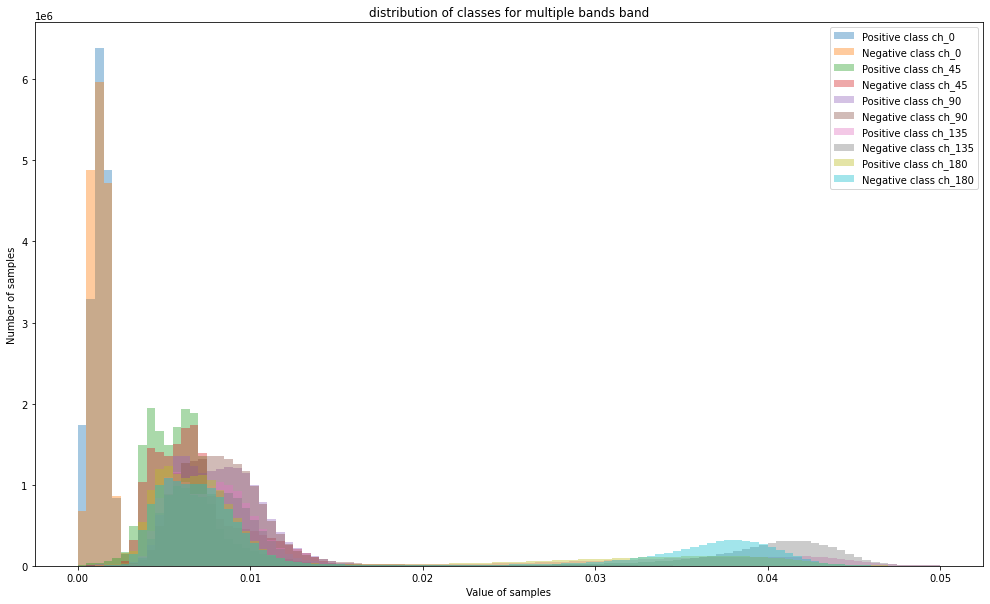

In [ ]:
plt.figure(figsize=(17, 10))

label = np.load('/content/drive/MyDrive/Thesis/bands_unnormalized/label.npy').reshape(-1, 1)

for im in range(0, 186, 45):
    # load channel 45 for sanity check
    band = np.load('/content/drive/MyDrive/Thesis/bands_unnormalized/band_' + str(im + 1) + '.npy')
    band = np.concatenate((band, label), axis=1)
    # index positive and negative class
    pos_ind = band[:, 1:2] == 1
    neg_ind = band[:, 1:2] == 0
    # filter values of classes based on index
    values = band[:, 0:1]
    pos_class = values[pos_ind]
    neg_class = values[neg_ind]

    # t_statistic, p_value = stats.ttest_ind(pos_class, neg_class)

    plt.hist(pos_class, label='Positive class ch_' + str(im), bins=100, alpha=0.4, range=[0, 0.05])
    plt.hist(neg_class, label='Negative class ch_' + str(im), bins=100, alpha=0.4, range=[0, 0.05])
    plt.xlabel('Value of samples')
    plt.ylabel('Number of samples')
    plt.title('distribution of classes for multiple bands band')
    plt.legend(loc='upper right')
    plt.savefig('/content/drive/MyDrive/Thesis/images/unnormalized/t_test/multiple_bands' + '.png')
    plt.show

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)